# Perceptron

## 01.1 Create a function (single neuron) with some inputs and outputs

In [26]:
import numpy as np

# Define the true weights and bias for a single neuron
# (see also http://d2l.ai/chapter_linear-networks/linear-regression-scratch.html)
true_weights = np.array([2, -3.4])
true_bias = 4.2

# Create some inputs using a standard normal distribution
number_examples = 1000
number_features = len(true_weights)
true_inputs = np.random.normal(loc=0.0, scale=1.0, size=(number_examples, number_features))

# Create some noise for all the examples using a normal distribution
true_noise = np.random.normal(loc=0.0, scale=0.01, size=number_examples)
    
# Compute the true outputs using the inputs, and the true weights, bias, and noise
true_outputs = np.matmul(true_inputs, true_weights) + true_bias + true_noise

## 01.2. Learn the parameters of the neuron using gradient descent (linear regression)

In [27]:
# Define the training parameters
number_epochs = 10
batch_size = 10
learning_rate = 0.03

# Initialize the predicted weights and bias
predicted_weights = np.random.normal(loc=0.0, scale=0.01, size=number_features)
predicted_bias = 0

# Initialize the loss for all the batches
predicted_loss = np.zeros(int(np.ceil(number_examples/batch_size)))

# Loop over the epochs
for i in range(number_epochs):
    
    # Loop over the batches
    k = 0
    for j in range(0, number_examples, batch_size):
        
        # Derive the end index of the batch
        j2 = min(j+batch_size, number_examples)
    
        # Compute the predicted outputs using the inputs, and the predicted weights and bias
        predicted_outputs = np.matmul(true_inputs[j:j2, :], predicted_weights) + predicted_bias

        # Compute the difference between the predicted outputs and the true outputs
        difference_outputs = predicted_outputs-true_outputs[j:j2]

        # Compute the loss using the mean squared error
        predicted_loss[k] = np.mean(0.5*np.power(difference_outputs, 2))

        # Update the predicted weights and bias using gradient descent, taking the derivative of the loss function
        predicted_weights = predicted_weights-learning_rate*np.mean(true_inputs[j:j2, :]*(difference_outputs)[:, np.newaxis], axis=0)
        predicted_bias = predicted_bias-learning_rate*np.mean(difference_outputs, axis=0)
        
        # Update the index
        k = k+1
        
    # Print the epoch and loss
    print(f"Epoch: {i}; loss: {np.mean(predicted_loss)}")
    
# Print the predicted weights and bias
print("")
print(f"Predicted weights: {predicted_weights}")
print(f"Predicted bias: {predicted_bias}")

Epoch: 0; loss: 2.8097675958922834
Epoch: 1; loss: 0.007768163216217438
Epoch: 2; loss: 7.728662892631507e-05
Epoch: 3; loss: 5.251561458964046e-05
Epoch: 4; loss: 5.235768947812039e-05
Epoch: 5; loss: 5.235289596052543e-05
Epoch: 6; loss: 5.2352640014332496e-05
Epoch: 7; loss: 5.2352625446847765e-05
Epoch: 8; loss: 5.235262460523376e-05
Epoch: 9; loss: 5.235262455617332e-05

Predicted weights: [ 2.00008566 -3.3996352 ]
Predicted bias: 4.199705558055032


## 01.3. Learn the parameters of the neuron using gradient descent in Keras

In [28]:
import tensorflow as tf

# Define the training parameters
number_epochs = 10
batch_size = 10
learning_rate = 0.03

# Initialize the model (as a feedforward NN)
model = tf.keras.Sequential()

# Add an input with the number of features
model.add(tf.keras.Input(shape=number_features))

# Add a densely-connected NN layer without activation and with initialized weights and bias
model.add(tf.keras.layers.Dense(1, activation=None, \
                                kernel_initializer=tf.initializers.RandomNormal(mean=0, stddev=0.01), \
                                bias_initializer="zeros"))

# Configure the model for training with gradient descent optimizer and mean squared error loss
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate), loss="mean_squared_error")

# Train the model give the batch size and number of epochs
model.fit(x=true_inputs, y=true_outputs, batch_size=batch_size, epochs=number_epochs, verbose=1)

# Print the predicted weights and bias
print("")
print(f"Predicted weights: {model.get_weights()[0][:, 0]}")
print(f"Predicted bias: {model.get_weights()[1][0]}")

Epoch 1/10
100/100 [==============================] - 0s 955us/step - loss: 2.8711
Epoch 2/10
100/100 [==============================] - 0s 920us/step - loss: 1.2382e-04
Epoch 3/10
100/100 [==============================] - 0s 1ms/step - loss: 1.0550e-04
Epoch 4/10
100/100 [==============================] - 0s 1ms/step - loss: 1.0520e-04
Epoch 5/10
100/100 [==============================] - 0s 1ms/step - loss: 1.0478e-04
Epoch 6/10
100/100 [==============================] - 0s 1ms/step - loss: 1.0555e-04
Epoch 7/10
100/100 [==============================] - 0s 1ms/step - loss: 1.0530e-04
Epoch 8/10
100/100 [==============================] - 0s 1ms/step - loss: 1.0528e-04
Epoch 9/10
100/100 [==============================] - 0s 1ms/step - loss: 1.0521e-04
Epoch 10/10
100/100 [==============================] - 0s 1ms/step - loss: 1.0533e-04

Predicted weights: [ 1.9992702 -3.4001608]
Predicted bias: 4.199626445770264


## 01.4. Learn the parameters of the neuron using an evolutionary algorithm

In [52]:
# Initialize the training parameters
number_epochs = 10
batch_size = 10
number_individuals = 10
number_parents = 1
mutation_rate = 0.2

# Initialize the predicted weights and bias
predicted_weights = np.random.normal(loc=0.0, scale=0.01, size=(number_features, number_individuals))
predicted_bias = np.zeros((1, number_individuals))

# Initialize the loss for all the batches and individuals
predicted_loss = np.zeros((int(np.ceil(number_examples/batch_size)), number_individuals))

# Loop over the epochs
for i in range(number_epochs):
    
    # Loop over the batches
    k = 0
    for j in range(0, number_examples, batch_size):
        
        # Derive the end index of the batch
        j2 = min(j+batch_size, number_examples)
    
        # Compute the predicted outputs using the inputs, and the predicted weights and bias, for every individual
        predicted_outputs = np.matmul(true_inputs[j:j2, :], predicted_weights) + predicted_bias

        # Compute the loss using the squared error, for every individual
        predicted_loss[k, :] = np.mean(np.power(predicted_outputs-true_outputs[j:j2, np.newaxis], 2), axis=0)
        
        # Get the indices of the parents, the fittest individuals
        parent_indices = np.argsort(predicted_loss[k, :])[0:number_parents]
        
        # Compute the mutation scale
        mutation_scale = mutation_rate*np.mean(predicted_loss[k, parent_indices])
        
        # Update the predicted weights and bias using evolutionary algorithm, doing crossover and mutation
        predicted_weights = np.mean(predicted_weights[:, parent_indices], axis=1)[:, np.newaxis] \
        + np.random.normal(loc=0.0, scale=mutation_scale, size=(number_features, number_individuals))
        predicted_bias = np.mean(predicted_bias[:, parent_indices]) \
        + np.random.normal(loc=0.0, scale=mutation_scale, size=(1, number_individuals))
        
        # Update the index
        k = k+1
        
    # Print the epoch and loss
    print(f"Epoch: {i}; loss: {np.mean(predicted_loss)}")
    
# Print the predicted weights and bias
print("")
print(f"Predicted weights: {np.mean(predicted_weights, axis=1)}")
print(f"Predicted bias: {np.mean(predicted_bias)}")

Epoch: 0; loss: 1.970950425913069
Epoch: 1; loss: 0.0006795033130501952
Epoch: 2; loss: 0.0002578746405028789
Epoch: 3; loss: 0.00015523713799769833
Epoch: 4; loss: 0.00012460719511757384
Epoch: 5; loss: 0.00011159377107515806
Epoch: 6; loss: 0.00010767630173089421
Epoch: 7; loss: 0.00010571976358958144
Epoch: 8; loss: 0.00010503888794022367
Epoch: 9; loss: 0.00010457581521683885

Predicted weights: [ 1.99948138 -3.39962192]
Predicted bias: 4.200280932747872


## 02.1. Prepare a dataset for a classification problem

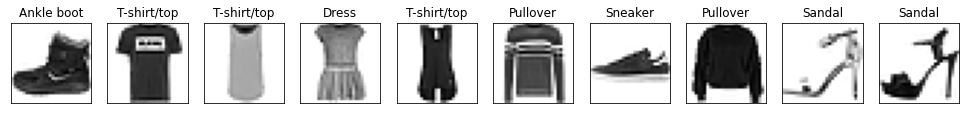

In [53]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Import the fashion-MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', \
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Show some of the data
plt.figure(figsize=(17, 10))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[i]])
    plt.xticks([])
    plt.yticks([])
plt.show()

# Get the number of train and test examples and the sizes of the inputs and outputs
number_train = np.shape(train_images)[0]
number_test = np.shape(test_images)[0]
input_size = np.shape(train_images)[1]*np.shape(train_images)[2]
output_size = len(class_names)

# Reshape the data and normalize it
train_inputs = np.reshape(train_images, (number_train, input_size))
train_inputs = train_inputs/255
test_inputs = np.reshape(test_images, (number_test, input_size))
test_inputs = test_inputs/255

## 02.2. Learn the parameters of a single neuron with a softmax

In [65]:
# Define the training parameters
number_epochs = 10
batch_size = 256
learning_rate = 0.03

# Initialize the weights and bias
train_weights = np.random.normal(loc=0.0, scale=0.01, size=(input_size, output_size))
train_biases = np.zeros(output_size)

# Initialize the loss for all the batches
model_loss = np.zeros(int(np.ceil(number_train/batch_size)))

# Loop over the epochs
for i in range(number_epochs):
    
    # Loop over the batches
    k = 0
    for j in range(0, number_train, batch_size):
        
        # Derive the end index of the batch
        j2 = min(j+batch_size, number_train)
    
        # Compute the predicted outputs using the inputs, and the learned weights and biases
        train_outputs2 = np.matmul(train_inputs[j:j2, :], train_weights) + train_biases
        
        train_outputs2 = np.exp(train_outputs2)
        train_outputs2 = train_outputs2/np.sum(train_outputs2, axis=1)[:, np.newaxis]
        
        # Update the index
        k = k+1